# Image Processing Using Machine Learning
---

## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Sift_Operations import *
print("Make Sure that both the images are in the same folder")

Make Sure that both the images are in the same folder


## Feature Mapping Using the SIFT Algorithm

Displaying SIFT Features


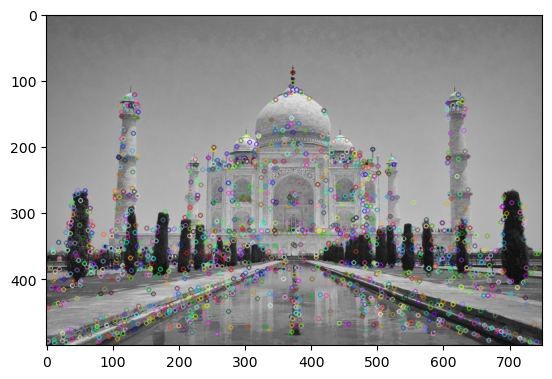

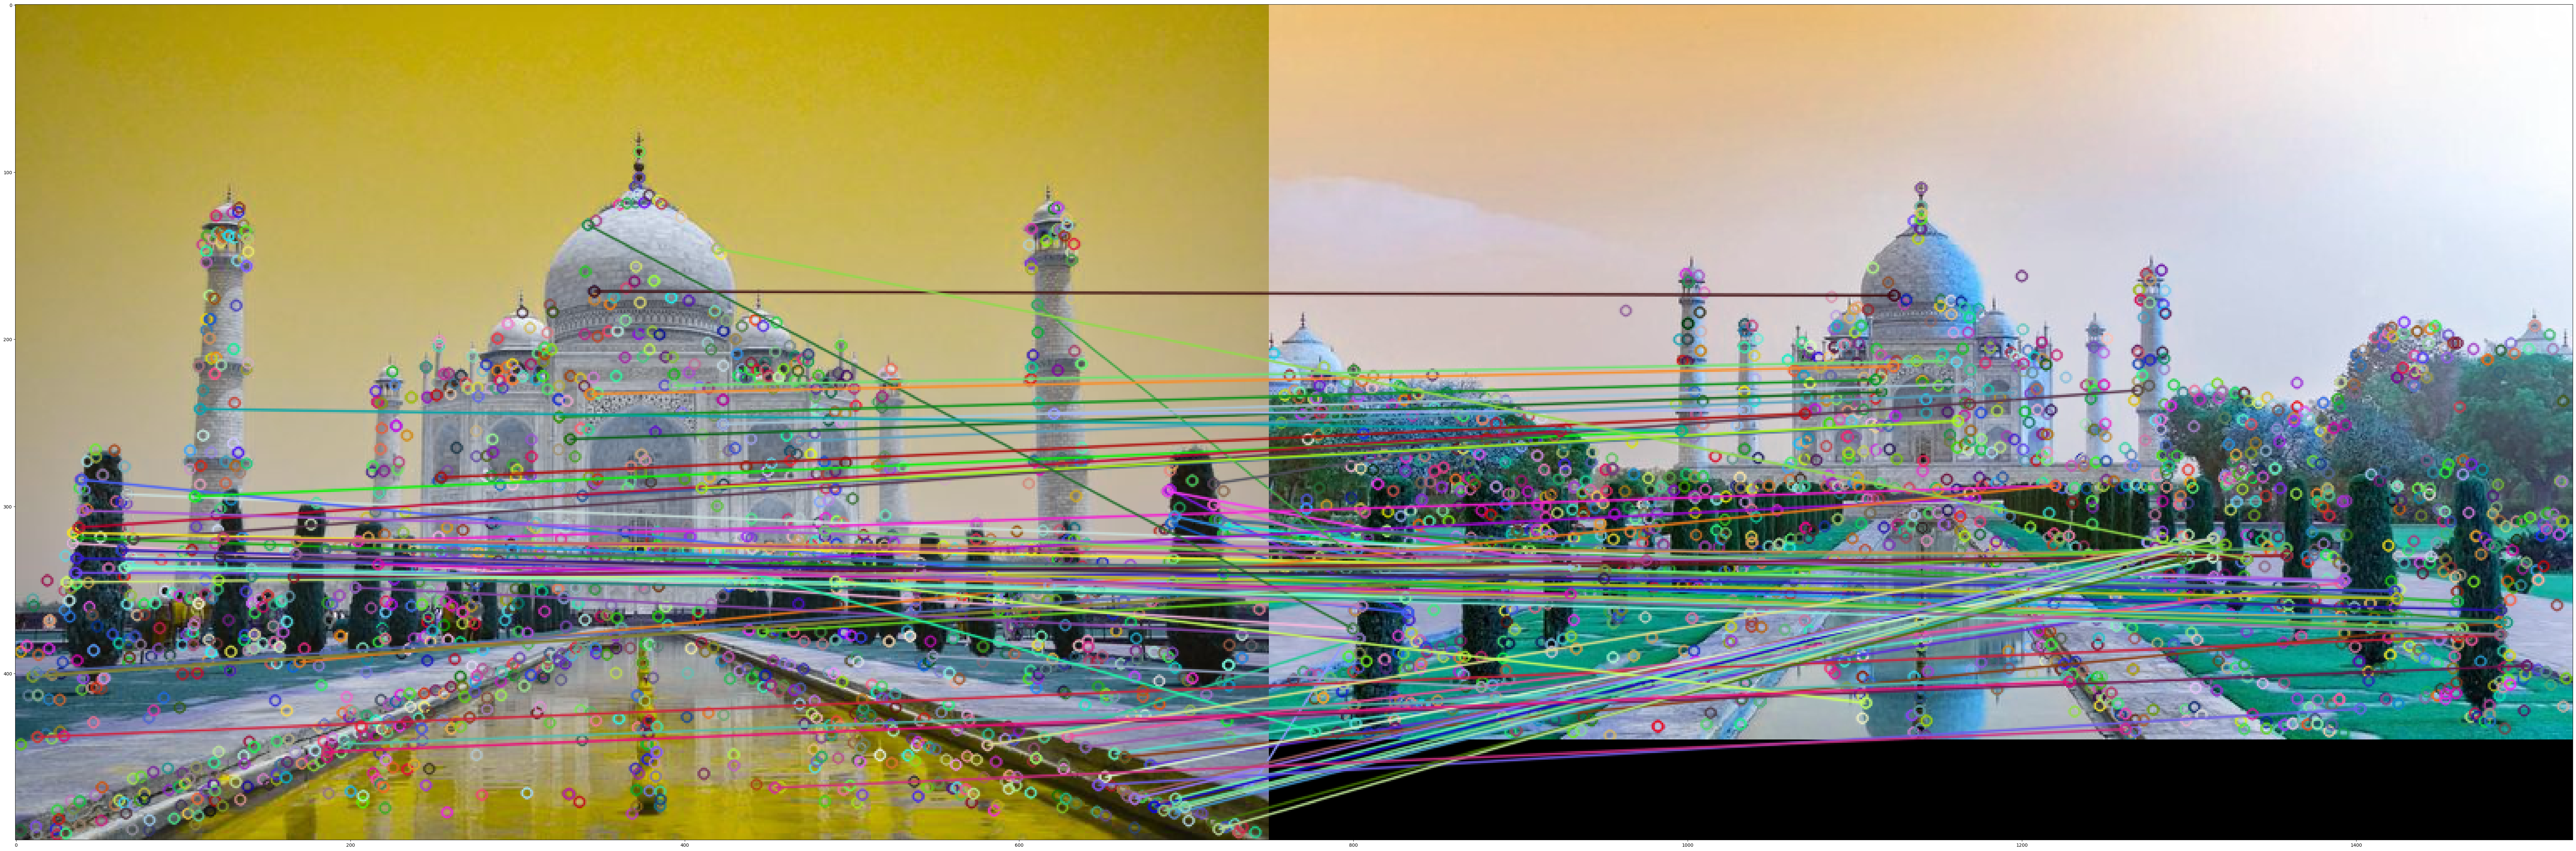

In [2]:
# Load images
x = input("Enter First Image Name: ")
Image1 = cv2.imread(x)
y = input("Enter Second Image Name: ")
Image2 = cv2.imread(y)

# Convert to grayscale
Image1_gray = cv2.cvtColor(Image1, cv2.COLOR_BGR2GRAY)
Image2_gray = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT feature
Image1_key_points, Image1_descriptors = extract_sift_features(Image1_gray)
Image2_key_points, Image2_descriptors = extract_sift_features(Image2_gray)

# Showing SIFT Feature
print( 'Displaying SIFT Features')
showing_sift_features(Image1_gray, Image1, Image1_key_points);

# Match descriptors using brute force
norm = cv2.NORM_L2
bruteForce = cv2.BFMatcher(norm)
matches = bruteForce.match(Image1_descriptors, Image2_descriptors)
matches = sorted(matches, key = lambda match:match.distance)
matched_img = cv2.drawMatches(
Image1, Image1_key_points,
Image2, Image2_key_points,
matches[:100], Image2.copy())

# Showing the Figure
plt.figure(figsize=(100,300))
plt.imshow(matched_img)

In [18]:
help(cv2)

Help on module cv2:

NAME
    cv2 - Python wrapper for OpenCV.

SUBMODULES
    Error
    alphamat
    aruco
    barcode
    bgsegm
    ccm
    colored_kinfu
    cuda
    datasets
    detail
    dnn
    dnn_superres
    dpm
    dynafu
    face
    fisheye
    flann
    ft
    gapi
    hdf
    hfs
    img_hash
    intensity_transform
    ipp
    kinfu
    large_kinfu
    legacy
    line_descriptor
    linemod
    mcc
    ml
    motempl
    multicalib
    ocl
    ogl
    omnidir
    optflow
    parallel
    phase_unwrapping
    plot
    ppf_match_3d
    quality
    rapid
    reg
    rgbd
    saliency
    samples
    segmentation
    stereo
    structured_light
    text
    utils
    videoio_registry
    videostab
    wechat_qrcode
    xfeatures2d
    ximgproc
    xphoto

CLASSES
    builtins.Exception(builtins.BaseException)
        error
    builtins.object
        Algorithm
            AlignExposures
                AlignMTB
            BackgroundSubtractor
                BackgroundSub

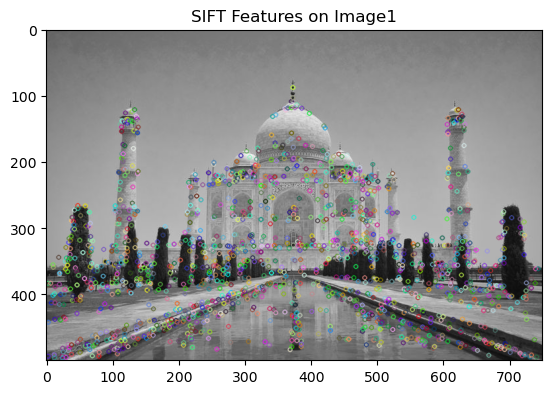

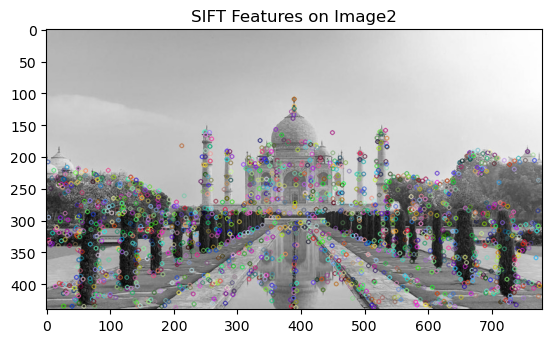

In [16]:
def extract_sift_features(img):
    sift_initialize = cv2.xfeatures2d.SIFT_create()
    key_points, descriptors = sift_initialize.detectAndCompute(img, None)
    return key_points, descriptors

def showing_sift_features(img1, img2, key_points):
    return plt.imshow(cv2.drawKeypoints(img1, key_points, img2.copy()))

# Assuming you have Image1 and Image2 already loaded
Image1_gray = cv2.cvtColor(Image1, cv2.COLOR_BGR2GRAY)
Image2_gray = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)

# Extract SIFT features for Image1_gray
key_points1, descriptors1 = extract_sift_features(Image1_gray)

# Show SIFT features on Image1_gray
showing_sift_features(Image1_gray, Image1, key_points1)
plt.title("SIFT Features on Image1")
plt.show()

# Extract SIFT features for Image2_gray
key_points2, descriptors2 = extract_sift_features(Image2_gray)

# Show SIFT features on Image2_gray
showing_sift_features(Image2_gray, Image2, key_points2)
plt.title("SIFT Features on Image2")
plt.show()

## Image Registration Using the RANSAC Algorithm

In [2]:
import numpy as np
import cv2
from Ransac import *
from Affine import *
from Align import *

In [3]:
img_source = cv2.imread("James-Bond-1.jpg")
img_target = cv2.imread("scenery.jpeg")

keypoint_source, descriptor_source = extract_SIFT(img_source)
keypoint_target, descriptor_target = extract_SIFT(img_target)
pos = match_SIFT(descriptor_source, descriptor_target)
H = affine_matrix(keypoint_source, keypoint_target, pos)

rows, cols, _ = img_target.shape
warp = cv2.warpAffine(img_source, H, (cols, rows))
merge = np.uint8(img_target * 0.5 + warp * 0.5)
cv2.imshow('img', merge)
cv2.waitKey(0)
cv2.destroyAllWindows()

[ WARN:0@548.713] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736
/Users/dharmayudafebrianto/Documents/Vs-Code Project/Digital Image Processing/Affine.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  M[2 * i: 2 * i + 2, :] = np.array(temp)
/Users/dharmayudafebrianto/Documents/Vs-Code Project/Digital Image Processing/Affine.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimension